# HR Analysis
## data: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
### 차은서가 맡은 부분
* **(교육) Education, EducationField, TrainingTimesLastYear**
⇒ 교육 수준이 높을수록 퇴사를 많이할까? 교육수준이 높은, 잘 훈련된 직원 이탈을 막으려면 인사팀은 어떤 해결책을 제시할 수 있을까? (석박사급 직원들이 회사에서 원하는 것은 뭘까?)

* **(직무) Department, JobRole, JobSatisfaction, StandardHours(애매), BusinessTravel, Education**
⇒ 직무별 특징이 퇴사율에 영향을 미칠까? 퇴사가 많이 일어나는 직무는 왜 그럴까? 인사팀은 이 문제를 어떻게 해결할 수 있을까?, 직무별 퇴사율 높은 직무와 그 이유 

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

# 컬럼 출력 생략 해제
pd.set_option('display.max_columns', None)

In [69]:
df_raw = pd.read_csv('data/HR-Employee-Attrition.csv', index_col='EmployeeNumber')
df_raw

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3


In [66]:
df_raw.shape

(1470, 34)

In [67]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [74]:
df_raw.duplicated().sum()

0

In [ ]:
# 전체 파일에서 내가 분석할 때 필요해보이는 데이터만 추출
# JobRole 직무역할, YearsSinceLastPromotion 마지막 승진 이후 근무기간
# df_jobedu = df[['JobLevel', 'JobSatisfaction', 'StandardHours', 'BusinessTravel', 'Education', 'EducationField', 'TrainingTimesLastYear', 'Age', 'Attrition', 'WorkLifeBalance', 'Department', 'EnvironmentSatisfaction', 'StandardHours', 'YearsWithCurrManager', 'JobRole', 'YearsSinceLastPromotion']]
# df_jobedu

## 부서는 총 Sales, RnD, HR로 구성되어 있고, 각 부서에 JobRole이 다름을 시각화

In [76]:
df_raw['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

<AxesSubplot:title={'center':'회사 내 부서'}>

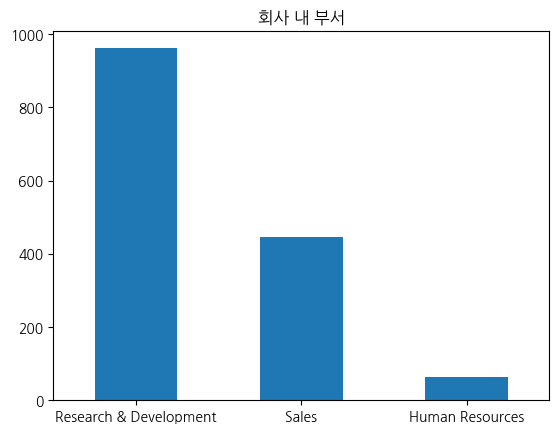

In [120]:
df_raw['Department'].value_counts().plot.bar(rot=0, title='회사 내 부서')

<AxesSubplot:title={'center':'부서 내 역할'}>

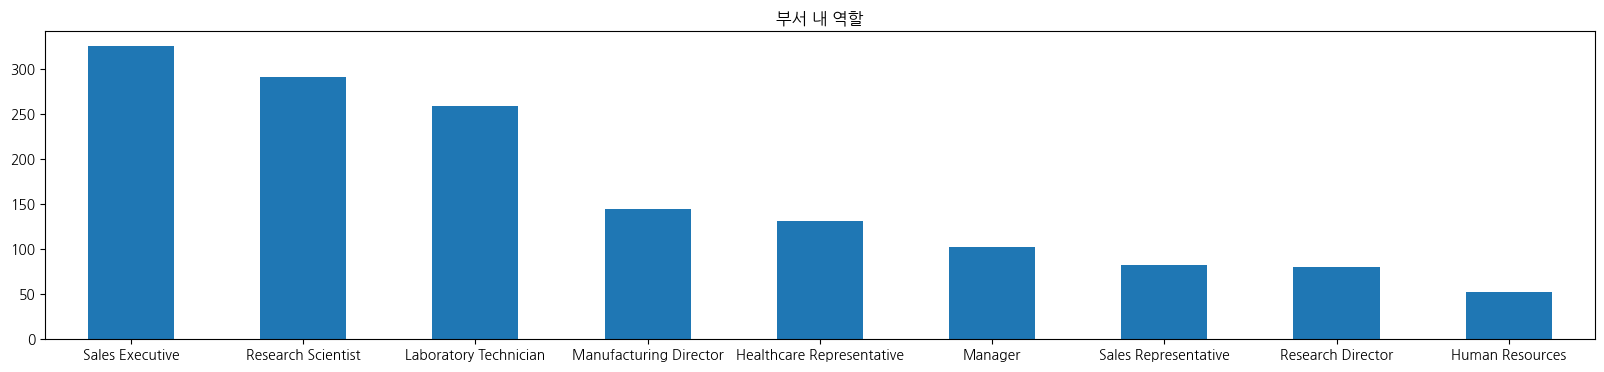

In [121]:
df_raw['JobRole'].value_counts().plot.bar(rot=0, figsize=(20,4), title='부서 내 역할')

<AxesSubplot:xlabel='JobRole', ylabel='count'>

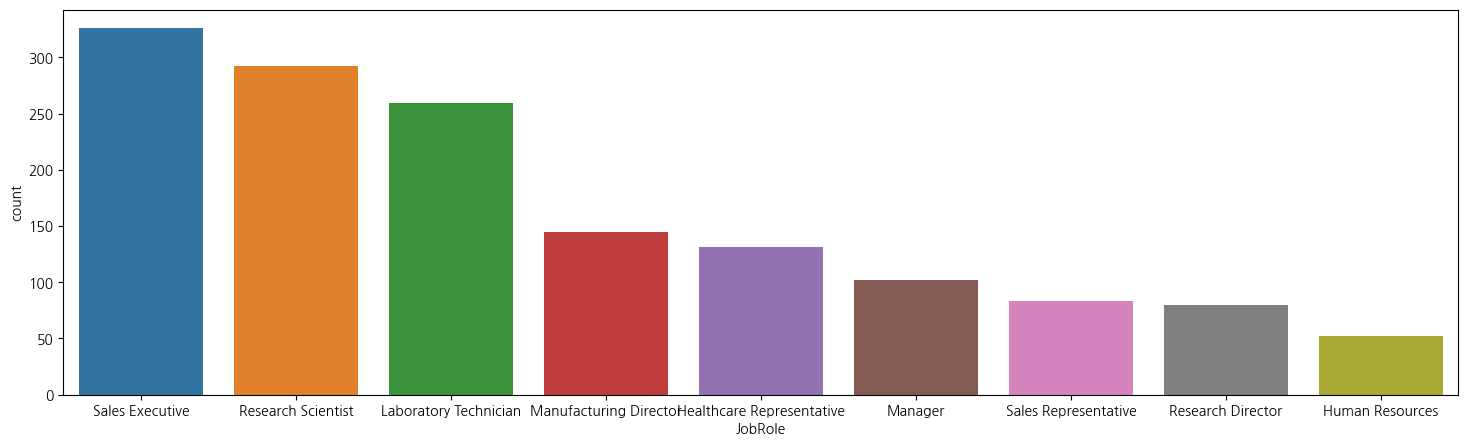

In [180]:
#  위에거랑 같은 것
plt.figure(figsize = [18,5])
sns.countplot(data=df_raw, x='JobRole')

In [85]:
df_RnD = df_raw[df_raw['Department']=='Research & Development']
df_RnD

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
8,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7


<AxesSubplot:title={'center':'RnD 부서에서 직무 역할'}>

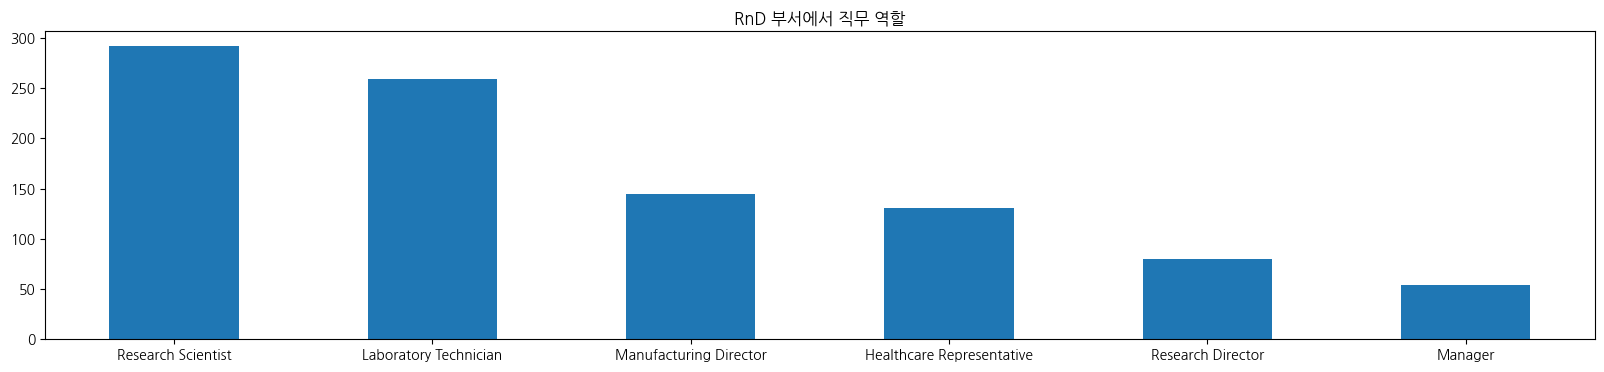

In [98]:
df_RnD['JobRole'].value_counts().plot.bar(rot=0, figsize=(20,4), title='RnD 부서에서 직무 역할')

In [91]:
df_sales = df_raw[df_raw['Department']=='Sales']
df_sales

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
23,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,1,Female,78,2,4,Manager,4,Married,15427,22021,2,Y,No,16,3,3,80,0,31,3,3,25,8,3,7
27,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
35,42,No,Travel_Rarely,691,Sales,8,4,Marketing,1,3,Male,48,3,2,Sales Executive,2,Married,6825,21173,0,Y,No,11,3,4,80,1,10,2,3,9,7,4,2
38,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,2,Female,83,3,5,Manager,1,Single,18947,22822,3,Y,No,12,3,4,80,0,22,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,45,No,Travel_Rarely,374,Sales,20,3,Life Sciences,1,4,Female,50,3,2,Sales Executive,3,Single,4850,23333,8,Y,No,15,3,3,80,0,8,3,3,5,3,0,1
2055,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0
2056,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6


<AxesSubplot:title={'center':'Sales 부서에서 직무 역할'}>

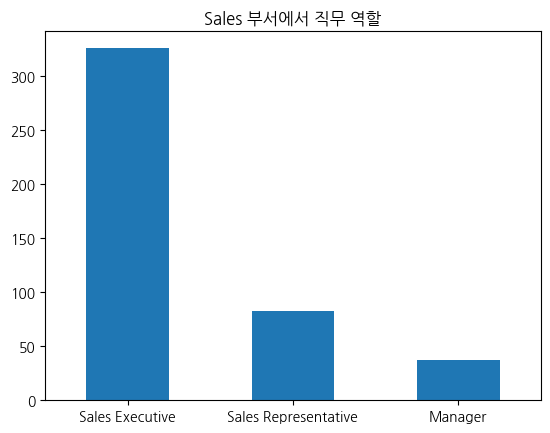

In [99]:
df_sales['JobRole'].value_counts().plot.bar(rot=0, title='Sales 부서에서 직무 역할')

In [94]:
df_hr = df_raw[df_raw['Department']=='Human Resources']
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
103,46,No,Travel_Rarely,945,Human Resources,5,2,Medical,1,2,Male,80,3,2,Human Resources,2,Divorced,5021,10425,8,Y,Yes,22,4,4,80,1,16,2,3,4,2,0,2
133,37,Yes,Travel_Rarely,807,Human Resources,6,4,Human Resources,1,3,Male,63,3,1,Human Resources,1,Divorced,2073,23648,4,Y,Yes,22,4,4,80,0,7,3,3,3,2,0,2
140,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,3,Female,32,2,5,Manager,4,Married,18844,21922,9,Y,No,21,4,4,80,1,30,3,3,3,2,2,2
148,54,No,Non-Travel,142,Human Resources,26,3,Human Resources,1,4,Female,30,4,4,Manager,4,Single,17328,13871,2,Y,Yes,12,3,3,80,0,23,3,3,5,3,4,4
177,26,No,Travel_Rarely,1355,Human Resources,25,1,Life Sciences,1,3,Female,61,3,1,Human Resources,3,Married,2942,8916,1,Y,No,23,4,4,80,1,8,3,3,8,7,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,27,Yes,Travel_Frequently,1337,Human Resources,22,3,Human Resources,1,1,Female,58,2,1,Human Resources,2,Married,2863,19555,1,Y,No,12,3,1,80,0,1,2,3,1,0,0,0
1972,38,No,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1973,55,No,Travel_Rarely,189,Human Resources,26,4,Human Resources,1,3,Male,71,4,5,Manager,2,Married,19636,25811,4,Y,Yes,18,3,1,80,1,35,0,3,10,9,1,4


<AxesSubplot:title={'center':'HR 부서에서 직무 역할'}>

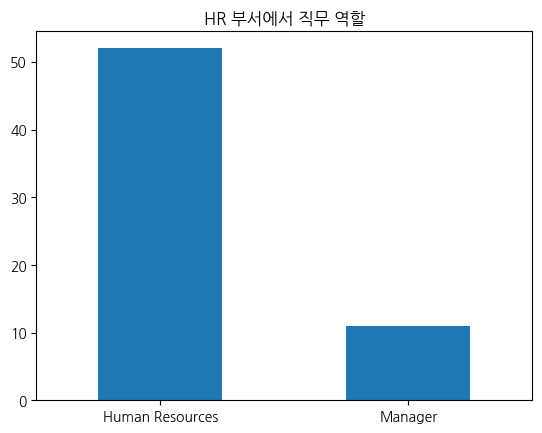

In [100]:
df_hr['JobRole'].value_counts().plot.bar(rot=0, title='HR 부서에서 직무 역할')

## 각 부서별 학력과 전공 알아보자

<AxesSubplot:>

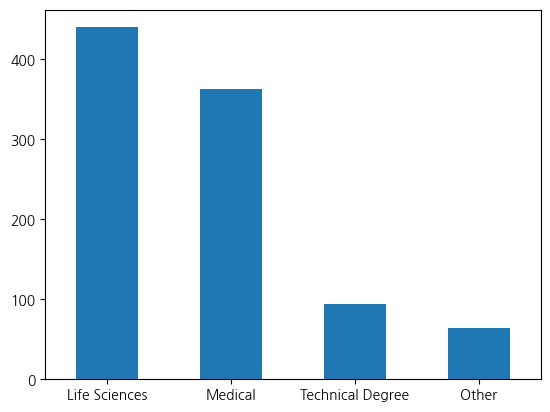

In [103]:
df_RnD['EducationField'].value_counts().plot.bar(rot=0)

Text(0.5, 1.0, 'RnD 학력')

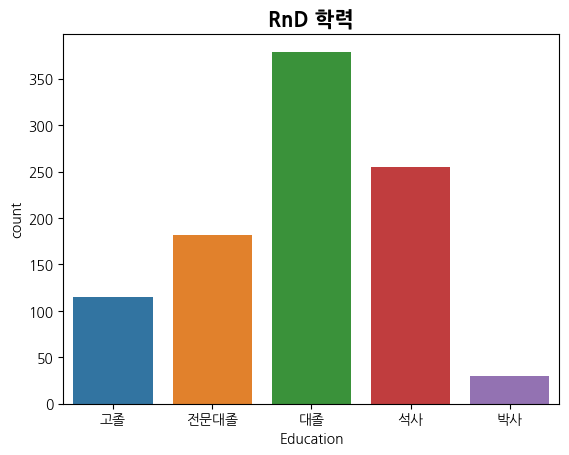

In [107]:
sns.countplot(data = df_RnD, 
              x = 'Education',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4], labels = ['고졸','전문대졸','대졸', '석사', '박사'])
plt.title('RnD 학력', weight = 'bold', size = 15)

Text(0.5, 1.0, 'Sales 학력')

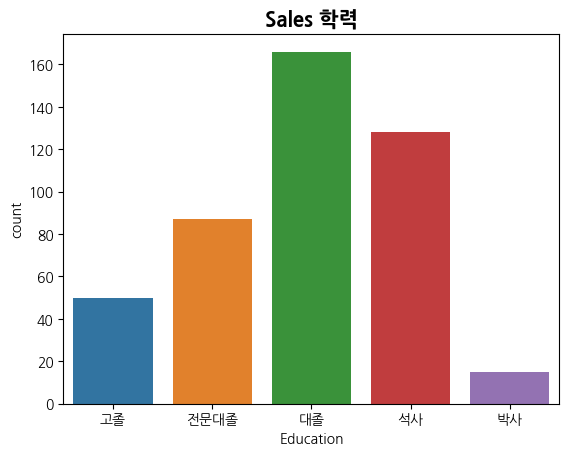

In [110]:
sns.countplot(data = df_sales, 
              x = 'Education',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4], labels = ['고졸','전문대졸','대졸', '석사', '박사'])
plt.title('Sales 학력', weight = 'bold', size = 15)

Text(0.5, 1.0, 'HR 학력')

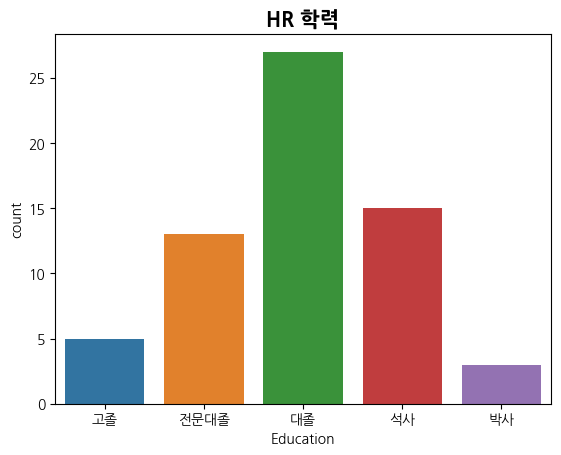

In [111]:
sns.countplot(data = df_hr, 
              x = 'Education',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4], labels = ['고졸','전문대졸','대졸', '석사', '박사'])
plt.title('HR 학력', weight = 'bold', size = 15)

## 부서별 Business Travel 정도
* 만들어진 데이터란 그런지,,,, 출장빈도가 비슷함!!

<AxesSubplot:title={'center':'RnD 출장 정도'}>

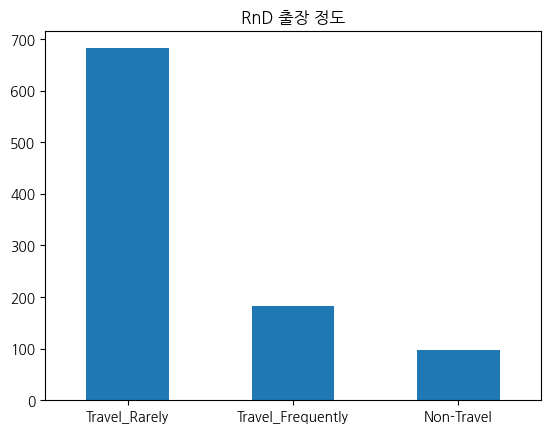

In [117]:
df_RnD['BusinessTravel'].value_counts().plot.bar(rot=0, title='RnD 출장 정도')

<AxesSubplot:title={'center':'Sales 출장 정도'}>

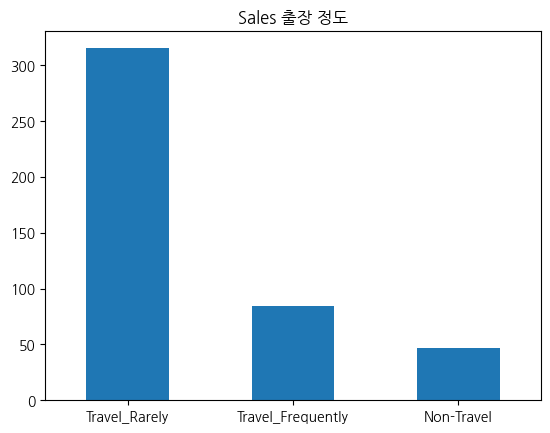

In [118]:
df_sales['BusinessTravel'].value_counts().plot.bar(rot=0, title='Sales 출장 정도')

<AxesSubplot:title={'center':'HR 출장 정도'}>

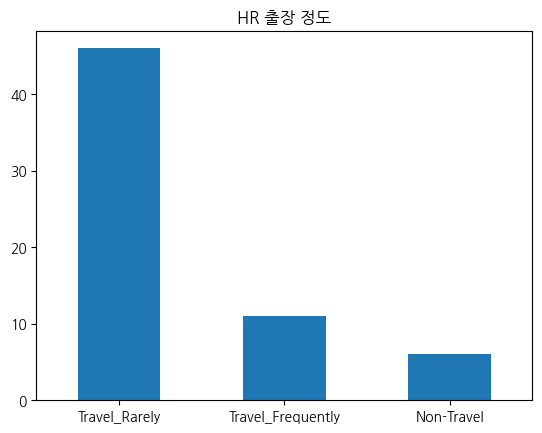

In [119]:
df_hr['BusinessTravel'].value_counts().plot.bar(rot=0, title='HR 출장 정도')

Text(0.5, 1.0, 'RnD 작년 교육 횟수')

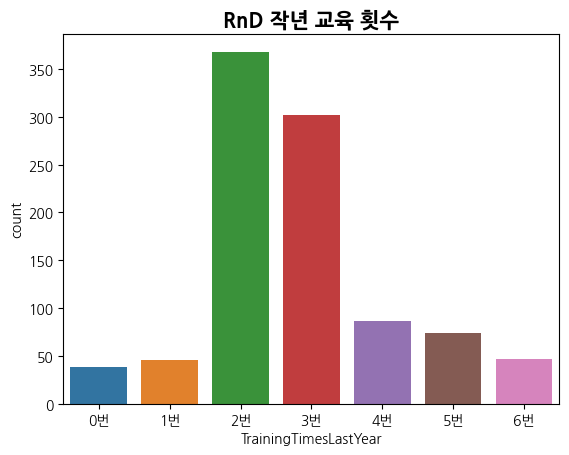

In [124]:

sns.countplot(data = df_RnD, 
              x = 'TrainingTimesLastYear',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['0번','1번','2번', '3번', '4번', '5번', '6번'])
plt.title('RnD 작년 교육 횟수', weight = 'bold', size = 15)

Text(0.5, 1.0, 'sales 작년 교육 횟수')

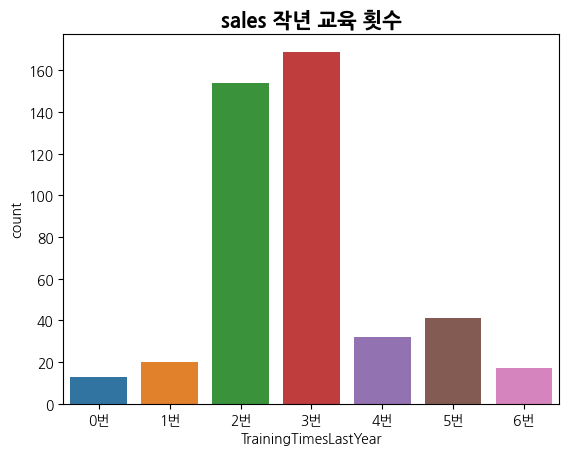

In [127]:

sns.countplot(data = df_sales, 
              x = 'TrainingTimesLastYear',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['0번','1번','2번', '3번', '4번', '5번', '6번'])
plt.title('sales 작년 교육 횟수', weight = 'bold', size = 15)

Text(0.5, 1.0, 'HR 작년 교육 횟수')

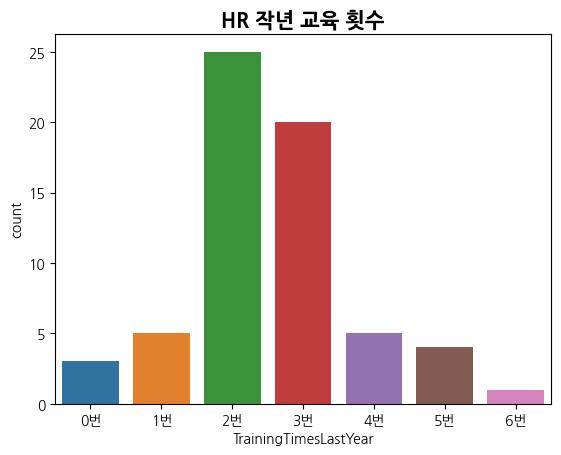

In [128]:
sns.countplot(data = df_hr, 
              x = 'TrainingTimesLastYear',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['0번','1번','2번', '3번', '4번', '5번', '6번'])
plt.title('HR 작년 교육 횟수', weight = 'bold', size = 15)

## 직무별 반족도

In [131]:
df_RnD['JobSatisfaction'].value_counts()

3    300
4    295
1    192
2    174
Name: JobSatisfaction, dtype: int64

Text(0.5, 1.0, 'RnD 직무 만족도')

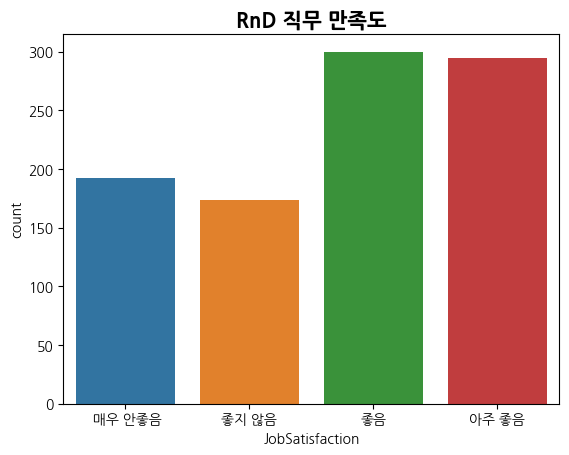

In [132]:
sns.countplot(data = df_RnD, 
              x = 'JobSatisfaction',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3], labels = [' 매우 안좋음','좋지 않음','좋음', '아주 좋음'])
plt.title('RnD 직무 만족도', weight = 'bold', size = 15)

Text(0.5, 1.0, 'Sales 직무 만족도')

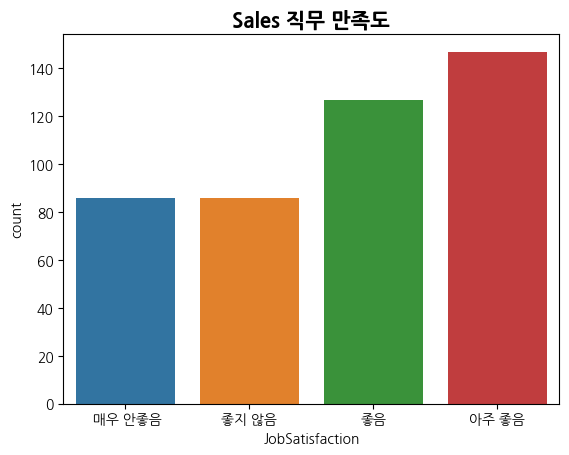

In [134]:
sns.countplot(data = df_sales, 
              x = 'JobSatisfaction',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3], labels = [' 매우 안좋음','좋지 않음','좋음', '아주 좋음'])
plt.title('Sales 직무 만족도', weight = 'bold', size = 15)

Text(0.5, 1.0, 'HR 직무 만족도')

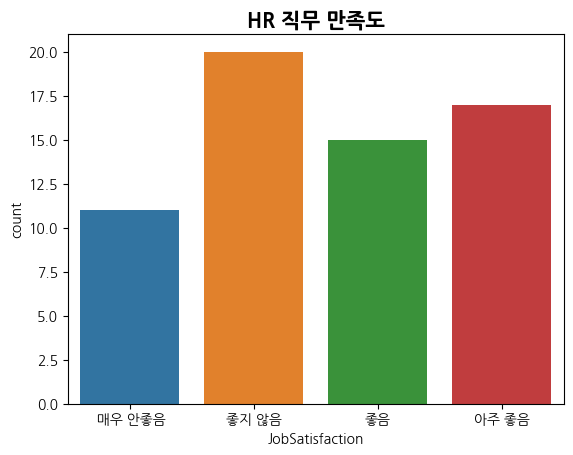

In [135]:
sns.countplot(data = df_hr, 
              x = 'JobSatisfaction',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3], labels = [' 매우 안좋음','좋지 않음','좋음', '아주 좋음'])
plt.title('HR 직무 만족도', weight = 'bold', size = 15)

## 퇴사 조사

Text(0.5, 1.0, 'RnD 퇴사 인원')

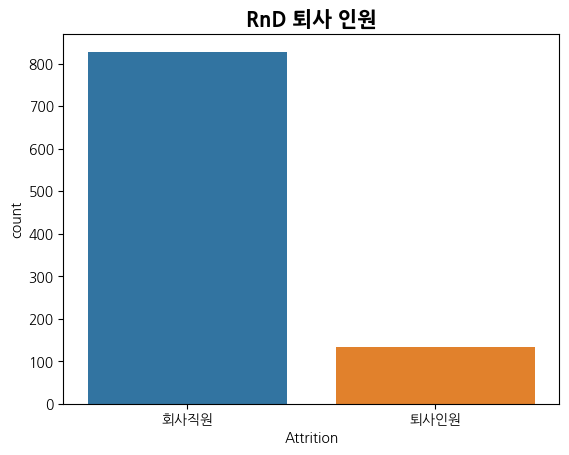

In [142]:
sns.countplot(data = df_RnD, 
              x = 'Attrition',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1], labels = ['회사직원','퇴사인원'])
plt.title('RnD 퇴사 인원', weight = 'bold', size = 15)

In [144]:
# 퇴사 직원 특징 알아보기
df_RnD.loc[df_RnD['Attrition']=='Yes']

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
19,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
31,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
33,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,2,Female,72,1,1,Research Scientist,1,Single,3919,4681,1,Y,Yes,22,4,2,80,0,10,5,3,10,2,6,7
45,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,2,Male,61,3,1,Research Scientist,4,Married,2293,3020,2,Y,Yes,16,3,1,80,1,6,2,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,56,Yes,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1,1,Male,97,3,1,Laboratory Technician,4,Single,2587,10261,1,Y,No,16,3,4,80,0,5,3,3,4,2,1,0
1939,32,Yes,Travel_Frequently,238,Research & Development,5,2,Life Sciences,1,1,Female,47,4,1,Research Scientist,3,Single,2432,15318,3,Y,Yes,14,3,1,80,0,8,2,3,4,1,0,3
1960,28,Yes,Travel_Rarely,1404,Research & Development,17,3,Technical Degree,1,3,Male,32,2,1,Laboratory Technician,4,Divorced,2367,18779,5,Y,No,12,3,1,80,1,6,2,2,4,1,0,3


In [145]:
df_out = df_raw.loc[df_raw['Attrition']=='Yes']
df_out

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
19,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
27,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
31,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,4,Male,33,3,1,Sales Representative,1,Married,1790,26956,1,Y,No,19,3,1,80,1,1,3,2,1,0,1,0
2027,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,1,Male,36,3,1,Research Scientist,4,Married,4787,26124,9,Y,Yes,14,3,2,80,3,4,3,4,2,2,2,2
2032,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,4,Male,72,3,1,Laboratory Technician,3,Married,2339,3666,8,Y,No,11,3,4,80,1,14,4,1,10,9,9,8


Text(0.5, 1.0, '퇴직자 만족도')

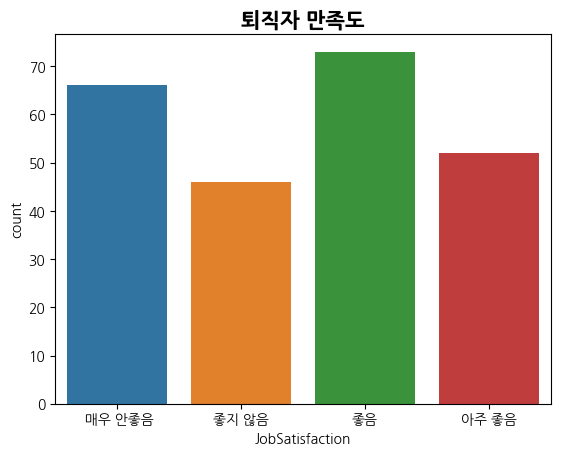

In [186]:
# 직무 만족도 => 이걸파보면 재밌을 듯 그러나 질문 설정이 애매하다. => HR에서 분석할 때, 설문지 항목에 그냥 귀하의 직무 만족도 어떤지 묻는 것보다는 구별을 해서 얻어야 더욱 필요한 정보를 얻을 수 있다.
# => 여기서의 만족도는 이 일을 좋아하는지의 여부인 것으로 판단된다.
# JobSatisfaction의 만족성이 좋은 사람들만 뽑아서 다른 환경 만족도 등을 보아서 비교하기! 일은 만족스러운데, 사람이 힘들거나 환경이 힘들다!!!!
sns.countplot(data = df_out, 
              x = 'JobSatisfaction',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3], labels = [' 매우 안좋음','좋지 않음','좋음', '아주 좋음'])
plt.title('퇴직자 만족도', weight = 'bold', size = 15)

Text(0.5, 1.0, '퇴사자들의 작년 교육 횟수')

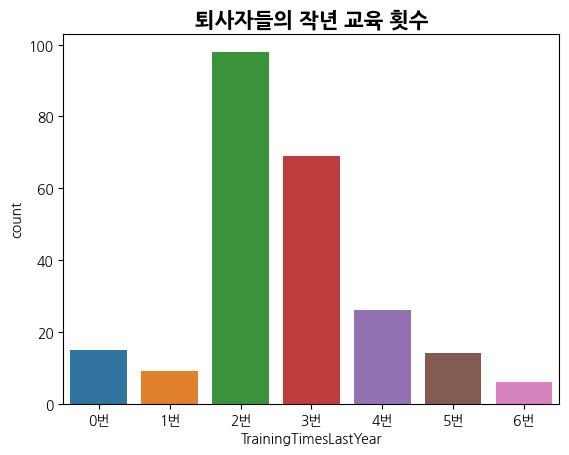

In [147]:
# 퇴사자들의 교육 횟수
sns.countplot(data = df_out, 
              x = 'TrainingTimesLastYear',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['0번','1번','2번', '3번', '4번', '5번', '6번'])
plt.title('퇴사자들의 작년 교육 횟수', weight = 'bold', size = 15)

<AxesSubplot:title={'center':'퇴사자들의 출장 정도'}>

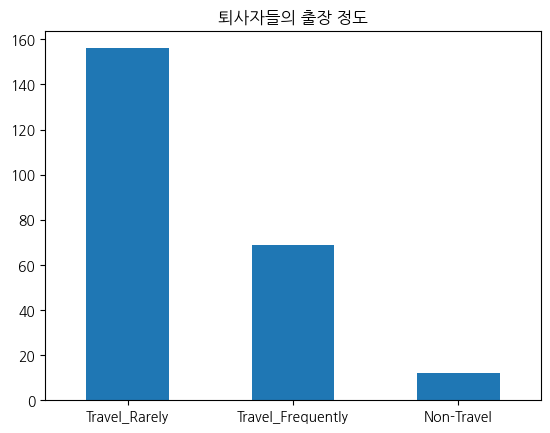

In [148]:
df_out['BusinessTravel'].value_counts().plot.bar(rot=0, title='퇴사자들의 출장 정도')

Text(0.5, 1.0, '퇴사자들 학력')

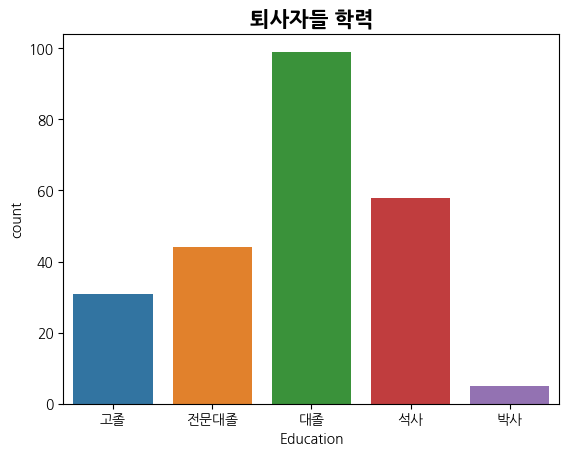

In [149]:
sns.countplot(data = df_out, 
              x = 'Education',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4], labels = ['고졸','전문대졸','대졸', '석사', '박사'])
plt.title('퇴사자들 학력', weight = 'bold', size = 15)

Text(0.5, 1.0, '전공별 퇴사')

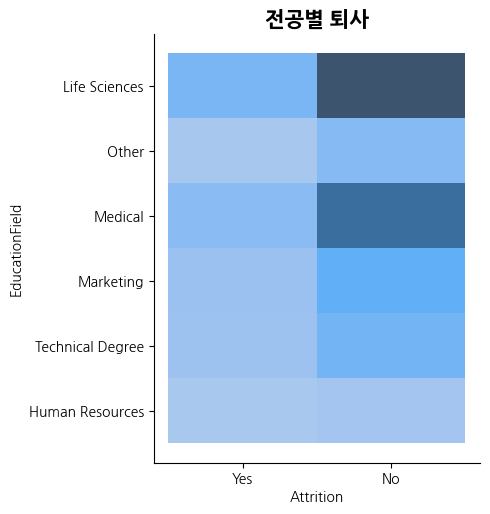

In [187]:
# 퇴사 안한 사람이 더 많아서 색 차이가 나타나는 듯
# 비율로 보기!!!
sns.displot(data = df_raw, 
            x='Attrition',
            y = 'EducationField',
#               palette = ['색깔정해서','넣자랏']
             )

plt.title('전공별 퇴사', weight = 'bold', size = 15)

In [181]:
# sns.catplot(data=df_raw, x='JobRole', kind='count')

In [185]:
df_raw['Over18'].nunique()

1